In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
def extract(file):
    data = pd.read_csv(file)
    #standard
    data.columns = ['palavra', 'status', 'tempo de execução', 'comparações', 'altura']

    return data

w_in_rbt = extract("../stats/rbt_word_inserts.csv")
w_in_bst = extract("../stats/bst_word_inserts.csv")
w_in_avl = extract("../stats/avl_word_inserts.csv")

f_rbt = pd.read_csv("../stats/rbt_total_inserts.csv")
f_bst = pd.read_csv("../stats/rbt_total_inserts.csv")
f_avl = pd.read_csv("../stats/avl_total_inserts.csv")


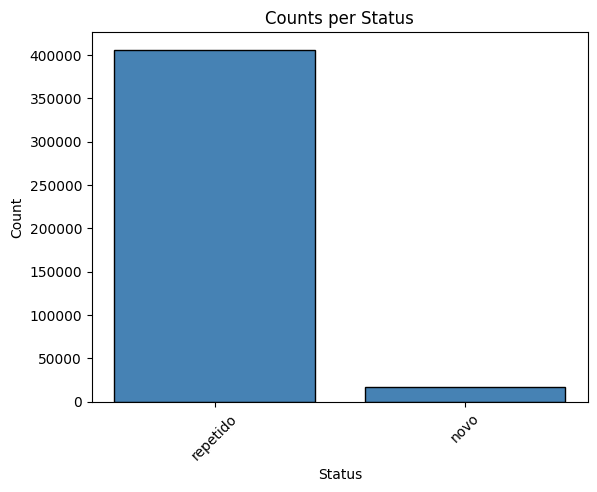

In [49]:

# Get the value counts of the 'status' column
status_counts = w_in_bst['status'].value_counts()

# Plot correctly: status names on X-axis, counts on Y-axis
plt.bar(status_counts.index.astype(str), status_counts.values, color='steelblue', edgecolor='black',)

plt.xlabel("Status")
plt.ylabel("Count")
plt.title("Counts per Status")
plt.xticks(rotation=45)
plt.xticks(np.arange(2), ['repetido', 'novo']) 
plt.show()


In [47]:
#contador de frequencia de comparações
def comp_hist(data):
    comp_counts = data['comparações'].value_counts()
    comp_counts.index = comp_counts.index.astype(int)
    comp_counts = comp_counts.sort_index()

    labels = comp_counts.index.astype(str)
    plt.bar(labels, comp_counts.values, color='orange', edgecolor='black')
    plt.xlabel("Comparações")
    plt.ylabel("Frequência")
    plt.title(f"Distribuição de Comparações de")
    plt.tight_layout()
    plt.show()


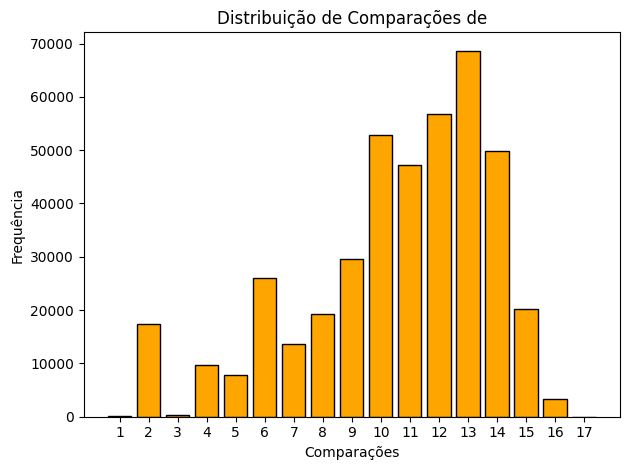

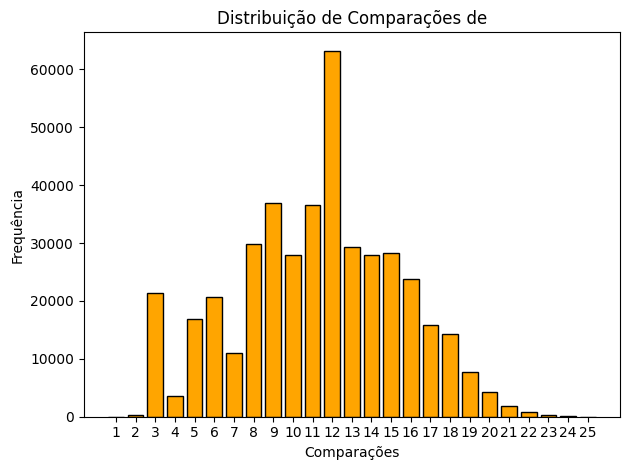

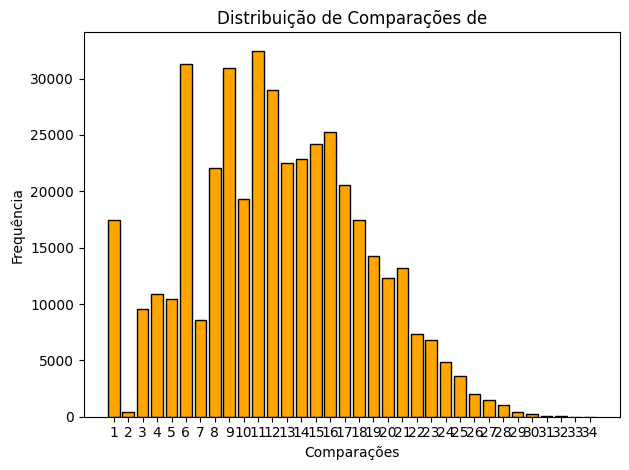

In [51]:
comp_hist(w_in_avl)
comp_hist(w_in_rbt)
comp_hist(w_in_bst)

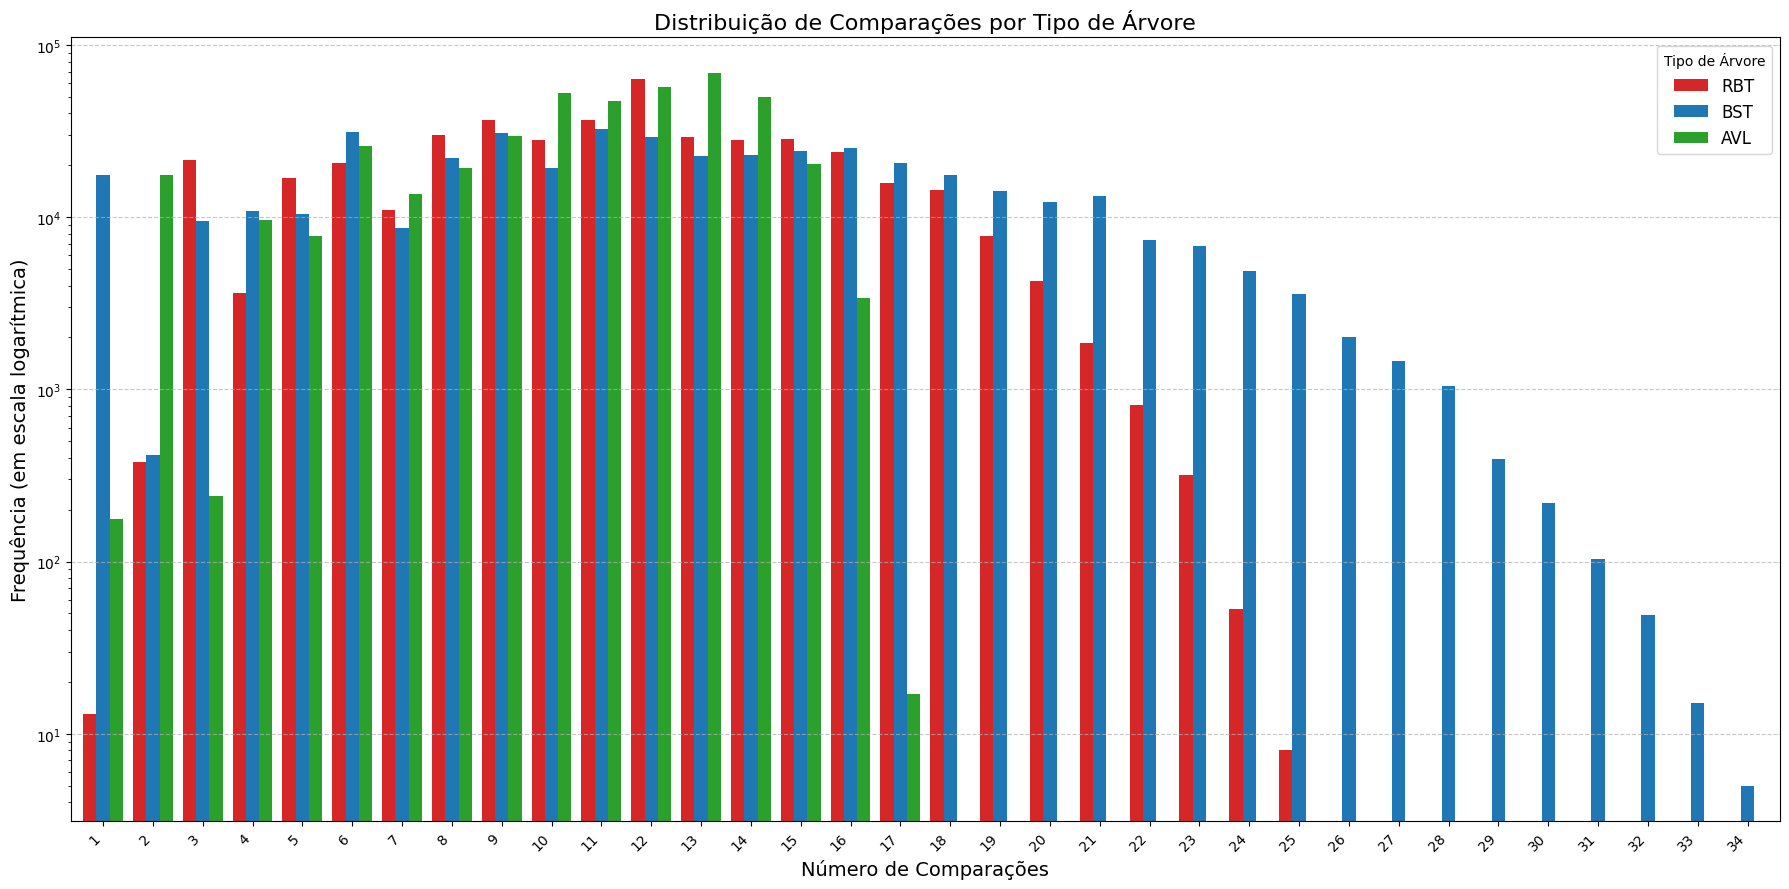

In [ ]:
# --- Helper Function ---
def get_comp_counts(data):
    """Calculates and sorts the value counts of the 'comparações' column."""
    comp_counts = data['comparações'].value_counts()
    comp_counts.index = comp_counts.index.astype(int)
    comp_counts = comp_counts.sort_index()
    return comp_counts

# --- Data Processing ---
# Get the comparison counts for each tree type from your loaded dataframes
rbt_counts = get_comp_counts(w_in_rbt)
bst_counts = get_comp_counts(w_in_bst)
avl_counts = get_comp_counts(w_in_avl)

# Combine the counts into a single DataFrame for easy plotting
all_counts_df = pd.DataFrame({
    'RBT': rbt_counts,
    'BST': bst_counts,
    'AVL': avl_counts
}).fillna(0).astype(int) # Fill missing comparison counts with 0

# --- Plotting ---
# Create the grouped bar chart
ax = all_counts_df.plot(
    kind='bar',
    figsize=(18, 9),
    width=0.8,
    color=['#d62728', '#1f77b4', '#2ca02c'] 
)

# --- Formatting the Plot ---
# Set labels and title in Portuguese to match your notebook
plt.xlabel("Número de Comparações", fontsize=14)
plt.ylabel("Frequência (em escala logarítmica)", fontsize=14)
plt.title("Distribuição de Comparações por Tipo de Árvore", fontsize=16)

# Use a logarithmic scale for the y-axis to better visualize
# the wide range of frequencies.
plt.yscale('log')

plt.xticks(rotation=45, ha='right')
plt.legend(title='Tipo de Árvore', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Display the final graph
plt.show()